Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Read Data

In [2]:
df_train = pd.read_csv("1991_stats.csv", delimiter=",")
df_train[0:5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,1,Chris Mullin*\mullich01,SF,27,GSW,82,82,40.4,9.5,17.7,...,1.7,3.7,5.4,4.0,2.1,0.8,3.0,2.1,25.7,1
1,2,Karl Malone*\malonka01,PF,27,UTA,82,82,40.3,10.3,19.6,...,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,1
2,3,Mitch Richmond*\richmmi01,SG,25,GSW,77,77,39.3,9.1,18.5,...,1.9,4.0,5.9,3.1,1.6,0.4,3.0,2.7,23.9,0
3,4,Tim Hardaway\hardati01,PG,24,GSW,82,82,39.2,9.0,18.9,...,1.1,3.0,4.0,9.7,2.6,0.1,3.3,2.8,22.9,0
4,5,Tyrone Corbin\corbity01,SF,28,MIN,82,82,39.0,7.2,16.0,...,2.3,4.9,7.2,4.2,2.0,0.6,2.5,3.1,18.0,0


In [3]:
df_test = pd.read_csv("1992_stats.csv", delimiter=",")
df_test[0:5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,1,Chris Mullin*\mullich01,SF,28,GSW,81,81,41.3,10.2,19.6,...,1.6,4.0,5.6,3.5,2.1,0.8,2.5,2.1,25.6,1
1,2,Tim Hardaway\hardati01,PG,25,GSW,81,81,41.1,9.1,19.7,...,1.0,2.8,3.8,10.0,2.0,0.2,3.3,2.6,23.4,1
2,3,Dennis Rodman*\rodmade01,PF,30,DET,82,80,40.3,4.2,7.7,...,6.4,12.3,18.7,2.3,0.8,0.9,1.7,3.0,9.8,1
3,4,James Worthy*\worthja01,SF,30,LAL,54,54,39.0,8.3,18.6,...,1.8,3.8,5.6,4.7,1.4,0.4,2.4,1.6,19.9,0
4,5,Joe Dumars*\dumarjo01,SG,28,DET,82,82,38.9,7.2,16.0,...,1.0,1.3,2.3,4.6,0.9,0.1,2.4,1.8,19.9,0


Pre-processing

In [4]:
df_train = df_train.drop(labels=['Rk','Player','Age','Tm','G','GS','MP'],axis=1)
df_train = df_train.fillna(0)
df_train[0:5]

,Pos,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,SF,9.5,17.7,0.536,0.5,1.6,0.301,9.0,16.0,0.560,...,1.7,3.7,5.4,4.0,2.1,0.8,3.0,2.1,25.7,1
1,PF,10.3,19.6,0.527,0.0,0.2,0.286,10.3,19.4,0.529,...,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,1
2,SG,9.1,18.5,0.494,0.5,1.5,0.348,8.6,17.0,0.506,...,1.9,4.0,5.9,3.1,1.6,0.4,3.0,2.7,23.9,0
3,PG,9.0,18.9,0.476,1.2,3.1,0.385,7.8,15.8,0.494,...,1.1,3.0,4.0,9.7,2.6,0.1,3.3,2.8,22.9,0
4,SF,7.2,16.0,0.448,0.0,0.1,0.200,7.1,15.9,0.450,...,2.3,4.9,7.2,4.2,2.0,0.6,2.5,3.1,18.0,0


In [5]:
df_test = df_test.drop(labels=['Rk','Player','Age','Tm','G','GS','MP'],axis=1)
df_test = df_test.fillna(0)
df_test[0:5]

,Pos,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isAllNBA
0,SF,10.2,19.6,0.524,0.8,2.2,0.366,9.5,17.4,0.544,...,1.6,4.0,5.6,3.5,2.1,0.8,2.5,2.1,25.6,1
1,PG,9.1,19.7,0.461,1.6,4.6,0.338,7.5,15.0,0.499,...,1.0,2.8,3.8,10.0,2.0,0.2,3.3,2.6,23.4,1
2,PF,4.2,7.7,0.539,0.4,1.2,0.317,3.8,6.5,0.581,...,6.4,12.3,18.7,2.3,0.8,0.9,1.7,3.0,9.8,1
3,SF,8.3,18.6,0.447,0.2,0.8,0.209,8.2,17.9,0.457,...,1.8,3.8,5.6,4.7,1.4,0.4,2.4,1.6,19.9,0
4,SG,7.2,16.0,0.448,0.6,1.5,0.408,6.6,14.5,0.452,...,1.0,1.3,2.3,4.6,0.9,0.1,2.4,1.8,19.9,0


In [6]:
X_train = df_train[['Pos', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].values
le_pos = preprocessing.LabelEncoder()
le_pos.fit(['PG','SG','SF','PF','C'])
X_train[:,0] = le_pos.transform(X_train[:,0])
X_train[0:5]

array([[3, 9.5, 17.7, 0.536, 0.5, 1.6, 0.301, 9.0, 16.0, 0.56, 0.55, 6.3,
        7.1, 0.884, 1.7, 3.7, 5.4, 4.0, 2.1, 0.8, 3.0, 2.1, 25.7],
       [1, 10.3, 19.6, 0.527, 0.0, 0.2, 0.286, 10.3, 19.4, 0.529, 0.528,
        8.3, 10.8, 0.77, 2.9, 8.9, 11.8, 3.3, 1.1, 1.0, 3.0, 3.3, 29.0],
       [4, 9.1, 18.5, 0.494, 0.5, 1.5, 0.348, 8.6, 17.0, 0.506, 0.508,
        5.1, 6.0, 0.847, 1.9, 4.0, 5.9, 3.1, 1.6, 0.4, 3.0, 2.7, 23.9],
       [2, 9.0, 18.9, 0.476, 1.2, 3.1, 0.385, 7.8, 15.8, 0.494, 0.508,
        3.7, 4.6, 0.803, 1.1, 3.0, 4.0, 9.7, 2.6, 0.1, 3.3, 2.8, 22.9],
       [3, 7.2, 16.0, 0.448, 0.0, 0.1, 0.2, 7.1, 15.9, 0.45, 0.449, 3.6,
        4.5, 0.798, 2.3, 4.9, 7.2, 4.2, 2.0, 0.6, 2.5, 3.1, 18.0]],
      dtype=object)

In [7]:
y_train = df_train["isAllNBA"]
y_train [0:5]

0    1
1    1
2    0
3    0
4    0
Name: isAllNBA, dtype: int64

In [8]:
X_test = df_test[['Pos', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].values
le_pos2 = preprocessing.LabelEncoder()
le_pos2.fit(['PG','SG','SF','PF','C'])
X_test[:,0] = le_pos2.transform(X_test[:,0])
X_test[0:5]

array([[3, 10.2, 19.6, 0.524, 0.8, 2.2, 0.366, 9.5, 17.4, 0.544, 0.544,
        4.3, 5.2, 0.833, 1.6, 4.0, 5.6, 3.5, 2.1, 0.8, 2.5, 2.1, 25.6],
       [2, 9.1, 19.7, 0.461, 1.6, 4.6, 0.338, 7.5, 15.0, 0.499, 0.501,
        3.7, 4.8, 0.766, 1.0, 2.8, 3.8, 10.0, 2.0, 0.2, 3.3, 2.6, 23.4],
       [1, 4.2, 7.7, 0.539, 0.4, 1.2, 0.317, 3.8, 6.5, 0.581, 0.564, 1.0,
        1.7, 0.6, 6.4, 12.3, 18.7, 2.3, 0.8, 0.9, 1.7, 3.0, 9.8],
       [3, 8.3, 18.6, 0.447, 0.2, 0.8, 0.209, 8.2, 17.9, 0.457, 0.451,
        3.1, 3.8, 0.814, 1.8, 3.8, 5.6, 4.7, 1.4, 0.4, 2.4, 1.6, 19.9],
       [4, 7.2, 16.0, 0.448, 0.6, 1.5, 0.408, 6.6, 14.5, 0.452, 0.466,
        5.0, 5.8, 0.867, 1.0, 1.3, 2.3, 4.6, 0.9, 0.1, 2.4, 1.8, 19.9]],
      dtype=object)

In [9]:
y_test = df_test["isAllNBA"]
y_test [0:5]

0    1
1    1
2    1
3    0
4    0
Name: isAllNBA, dtype: int64

In [10]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

Modeling

In [11]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [13]:
predTree = decTree.predict(X_test)

Evaluation

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9533333333333334


In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted') 

0.9468215350808352

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predTree,pos_label=0)

0.9507042253521126

Visualization

In [17]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

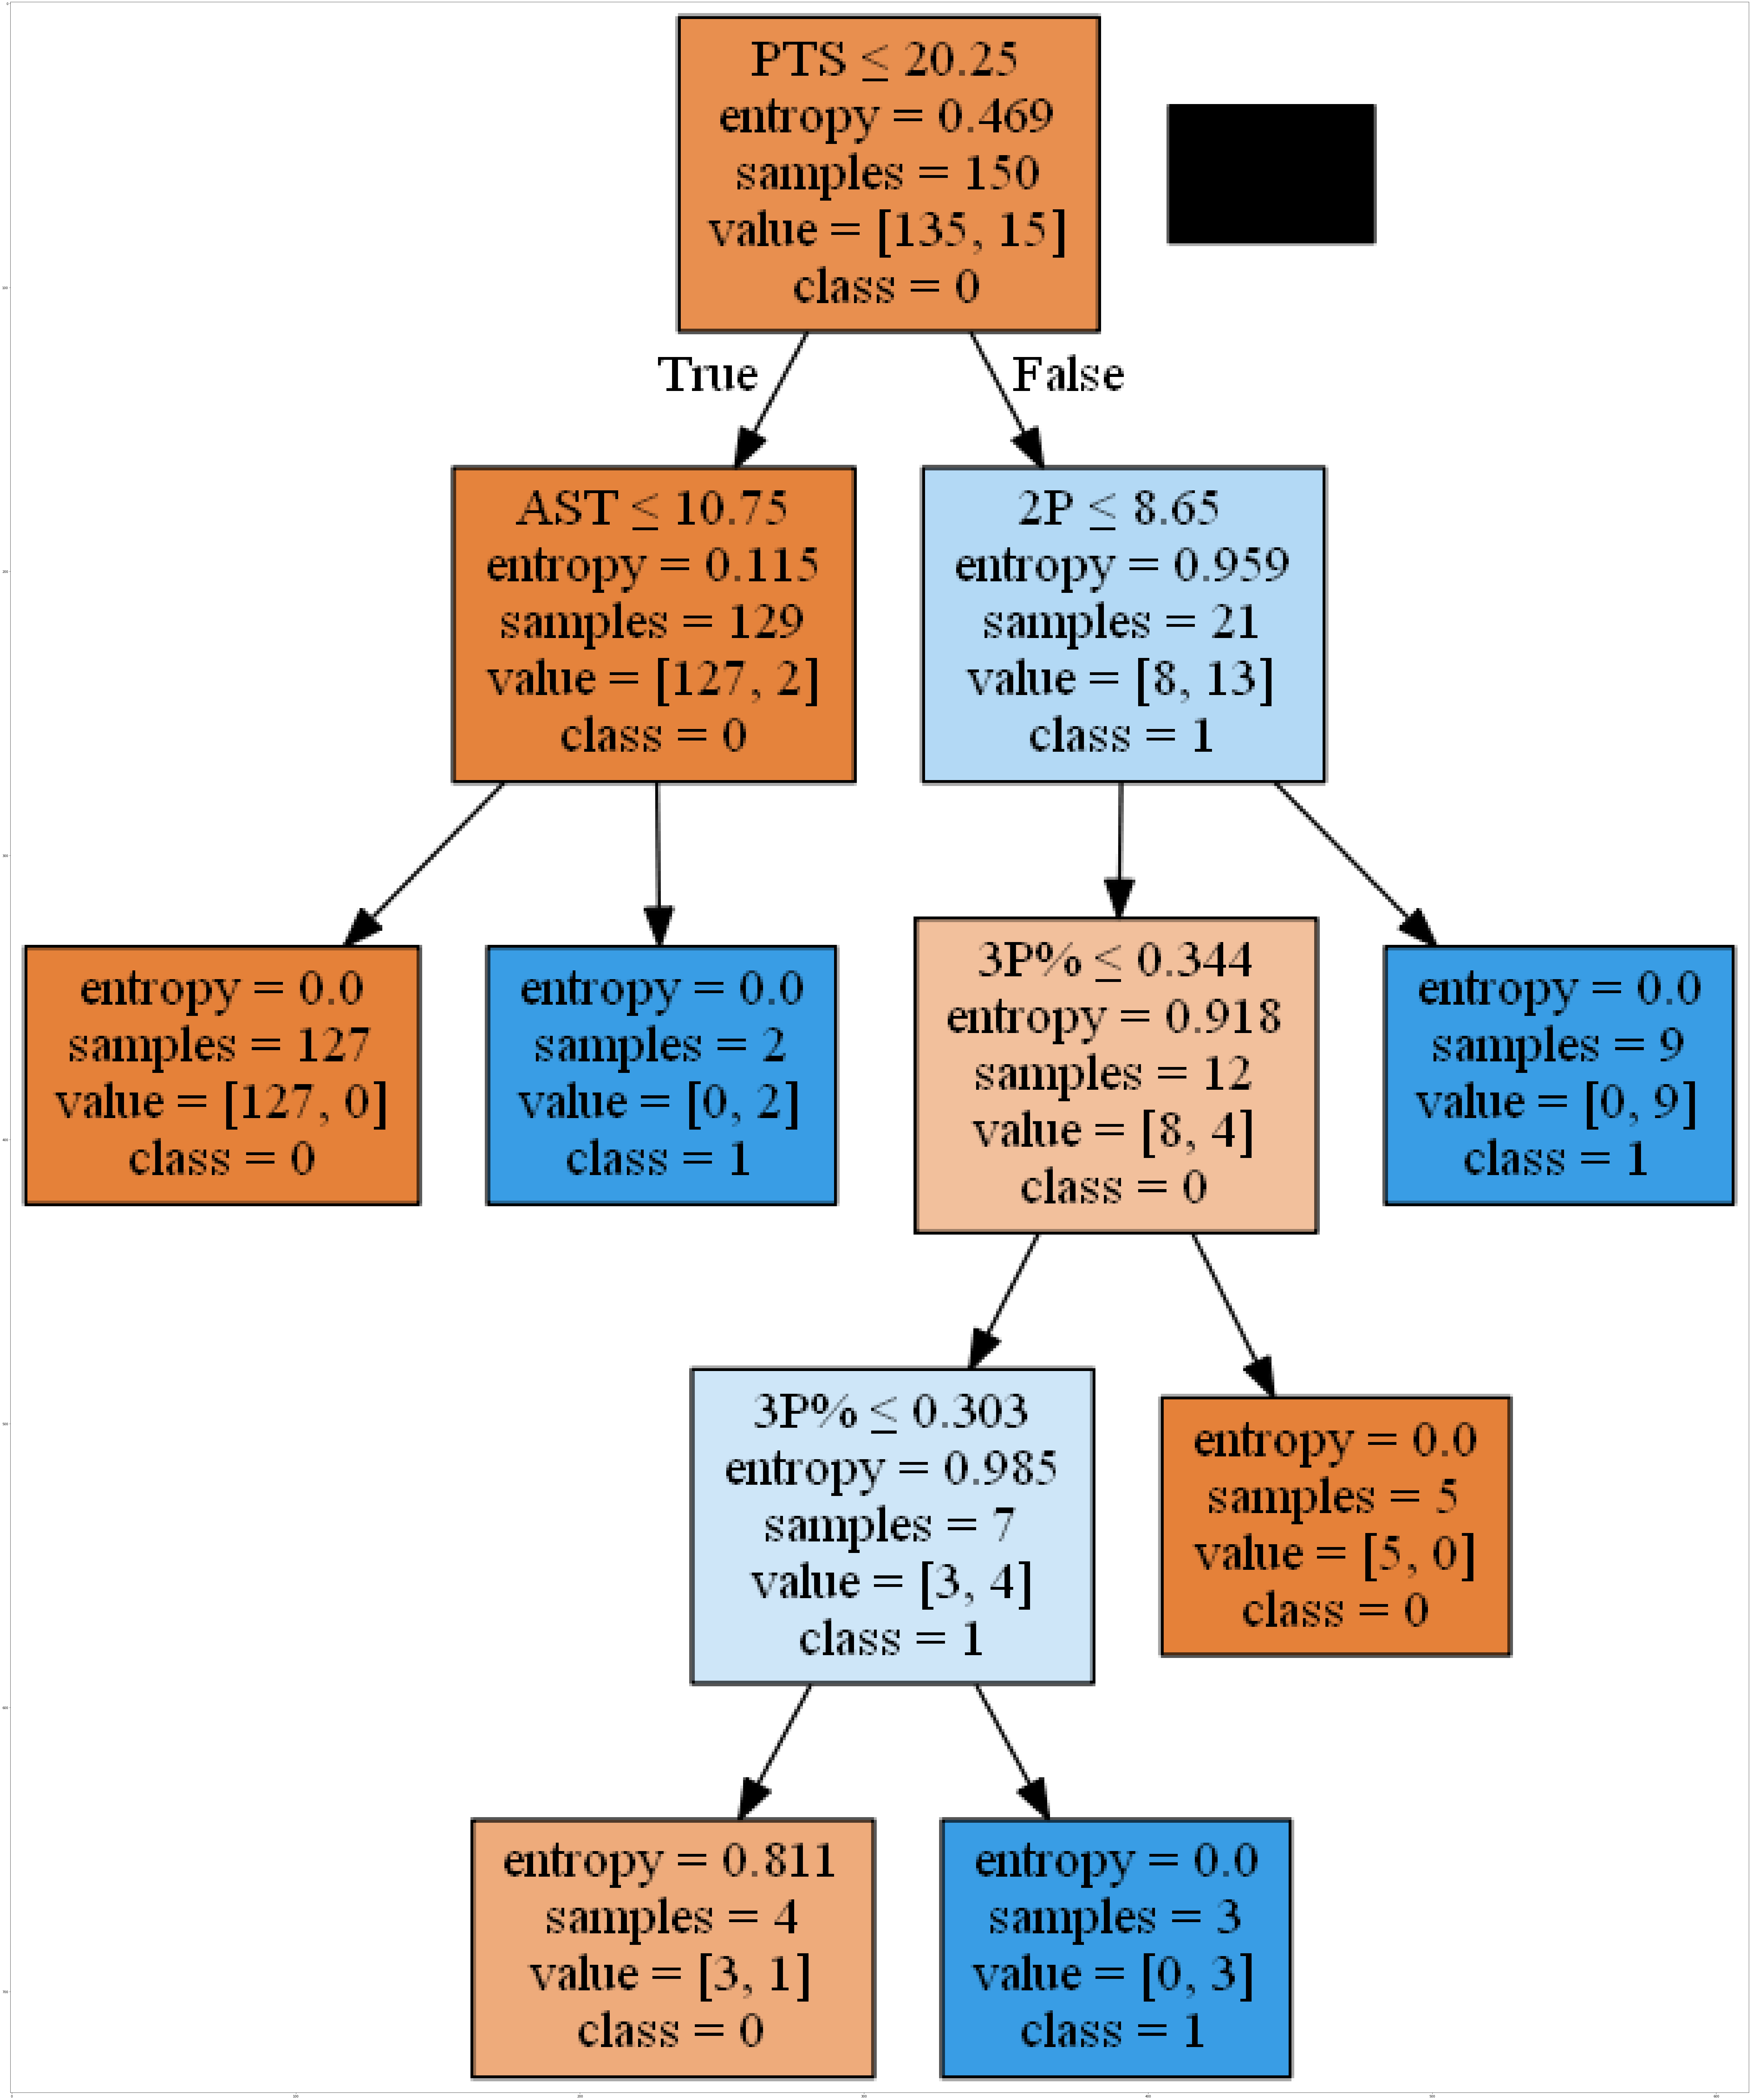

In [18]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = df_test.columns[0:23]
out=tree.export_graphviz(decTree,feature_names=featureNames, out_file=dot_data, class_names= ["0","1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       135
           1       1.00      0.53      0.70        15

    accuracy                           0.95       150
   macro avg       0.98      0.77      0.84       150
weighted avg       0.96      0.95      0.95       150

Confusion matrix, without normalization
[[135   0]
 [  7   8]]


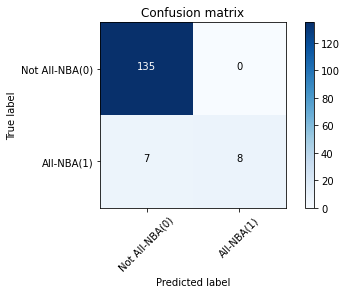

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [22]:
decTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree2.fit(X_res,y_res)
predTree2 = decTree2.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree2))

DecisionTrees's Accuracy:  0.9266666666666666


In [23]:
f1_score(y_test, predTree2, average='weighted') 

0.927713155054563

In [24]:
jaccard_score(y_test, predTree2,pos_label=0)

0.9214285714285714

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       135
           1       0.62      0.67      0.65        15

    accuracy                           0.93       150
   macro avg       0.79      0.81      0.80       150
weighted avg       0.93      0.93      0.93       150

Confusion matrix, without normalization
[[129   6]
 [  5  10]]


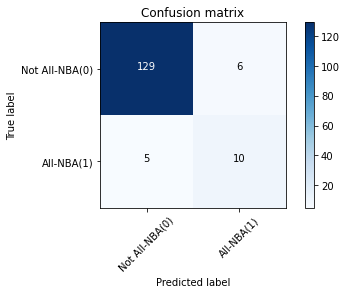

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [27]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.9266666666666666

In [29]:
f1_score(y_test, yhat, average='weighted') 

0.9068739464319162

In [30]:
jaccard_score(y_test, yhat,pos_label=0)

0.9246575342465754

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       135
           1       1.00      0.27      0.42        15

    accuracy                           0.93       150
   macro avg       0.96      0.63      0.69       150
weighted avg       0.93      0.93      0.91       150

Confusion matrix, without normalization
[[135   0]
 [ 11   4]]


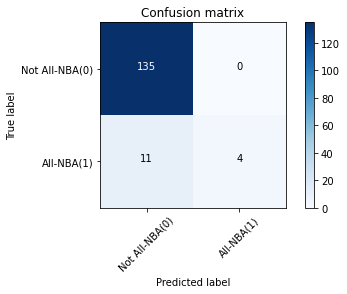

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [32]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_res, y_res) 

SVC()

In [33]:
yhat2 = clf.predict(X_test)
yhat2 [0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [34]:
accuracy_score(y_test, yhat2)

0.9333333333333333

In [35]:
f1_score(y_test, yhat2, average='weighted') 

0.9367536488279523

In [36]:
jaccard_score(y_test, yhat2,pos_label=0)

0.927536231884058

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       135
           1       0.63      0.80      0.71        15

    accuracy                           0.93       150
   macro avg       0.80      0.87      0.83       150
weighted avg       0.94      0.93      0.94       150

Confusion matrix, without normalization
[[128   7]
 [  3  12]]


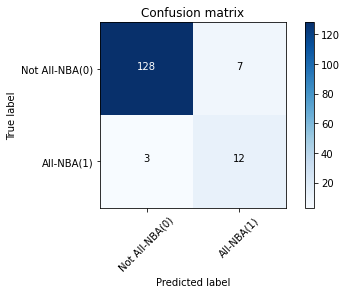

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [39]:
from sklearn.metrics import accuracy_score
mlp.fit(X_train, y_train)
predANN = mlp.predict(X_test)
acc_val = accuracy_score(y_test, predANN)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9


In [40]:
f1_score(y_test, predANN, average='weighted') 

0.8526315789473685

In [41]:
jaccard_score(y_test, predANN,pos_label=0)

0.9

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       135
           1       0.00      0.00      0.00        15

    accuracy                           0.90       150
   macro avg       0.45      0.50      0.47       150
weighted avg       0.81      0.90      0.85       150

Confusion matrix, without normalization
[[135   0]
 [ 15   0]]


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


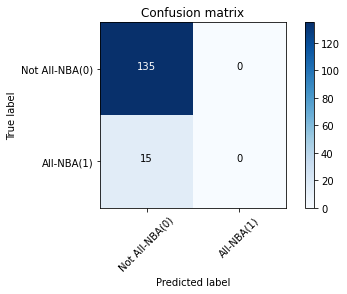

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [43]:
mlp.fit(X_res, y_res)
predANN2 = mlp.predict(X_test)
acc_val = accuracy_score(y_test, predANN2)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9466666666666667


In [44]:
f1_score(y_test, predANN2, average='weighted') 

0.9429533969679956

In [45]:
jaccard_score(y_test, predANN2,pos_label=0)

0.9432624113475178

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.82      0.60      0.69        15

    accuracy                           0.95       150
   macro avg       0.89      0.79      0.83       150
weighted avg       0.94      0.95      0.94       150

Confusion matrix, without normalization
[[133   2]
 [  6   9]]


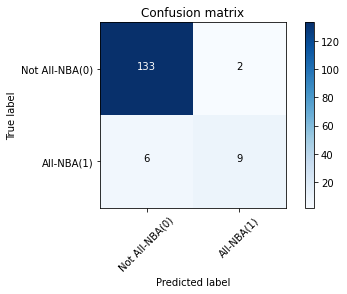

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
predLR = LR.predict(X_test)
accuracy_score(y_test, predLR)

0.9

In [48]:
f1_score(y_test, predLR, average='weighted') 

0.8526315789473685

In [49]:
jaccard_score(y_test, predLR,pos_label=0)

0.9

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       135
           1       0.00      0.00      0.00        15

    accuracy                           0.90       150
   macro avg       0.45      0.50      0.47       150
weighted avg       0.81      0.90      0.85       150

Confusion matrix, without normalization
[[135   0]
 [ 15   0]]


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


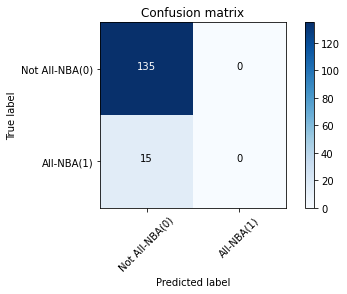

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [51]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_res,y_res)
predLR2 = LR.predict(X_test)
accuracy_score(y_test, predLR2)

0.84

In [52]:
f1_score(y_test, predLR2, average='weighted') 

0.8642857142857142

In [53]:
jaccard_score(y_test, predLR,pos_label=0)

0.9

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       135
           1       0.36      0.80      0.50        15

    accuracy                           0.84       150
   macro avg       0.67      0.82      0.70       150
weighted avg       0.91      0.84      0.86       150

Confusion matrix, without normalization
[[114  21]
 [  3  12]]


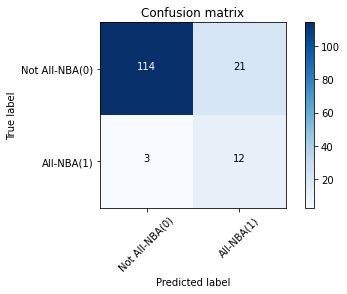

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predLR2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')